# Import Libraries

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Import Data

In [46]:
#Read a table file
df = pd.read_table("C:/Users/iakov/Desktop/James/Uni/ΠΑΠΕΙ/Τ.ΠΛ/6οΕξάμηνο/ΑναλυτικήΔεδομένων/Project/bank_full_text_data.txt", names = ["age", "job", "marital", "education",
                   "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"], skiprows = 1)
#Check dimensions of the data (records x features)
df.shape

(45211, 17)

In [47]:
#Show the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
#Use part of the dataset
df = df[["age", "balance", "housing", "loan", "duration", "y"]]
df.head()

,age,balance,housing,loan,duration,y
0,58,2143,yes,no,261,no
1,44,29,yes,no,151,no
2,33,2,yes,yes,76,no
3,47,1506,yes,no,92,no
4,33,1,no,no,198,no


In [49]:
#Target Variable values
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

# Categorical Feature Encoding

In [50]:
#Dummy code the categorical features
dummy1 = pd.get_dummies(df["housing"], prefix = 'housing-', prefix_sep = '' , dtype = int)
dummy2 = pd.get_dummies(df["loan"], prefix = 'loan-', prefix_sep = '' , dtype = int)
dummy1.shape, dummy2.shape

((45211, 2), (45211, 2))

In [51]:
#Concatenate the dummy encoded categorical features to df
df_final = pd.concat([df, dummy1, dummy2], axis = 1)
df_final.head()

,age,balance,housing,loan,duration,y,housing-no,housing-yes,loan-no,loan-yes
0,58,2143,yes,no,261,no,0,1,1,0
1,44,29,yes,no,151,no,0,1,1,0
2,33,2,yes,yes,76,no,0,1,0,1
3,47,1506,yes,no,92,no,0,1,1,0
4,33,1,no,no,198,no,1,0,1,0


In [52]:
#Drop features "housing" and "loan"
df_final = df_final.drop(["housing", "loan"], axis = 1)
df_final.head()

,age,balance,duration,y,housing-no,housing-yes,loan-no,loan-yes
0,58,2143,261,no,0,1,1,0
1,44,29,151,no,0,1,1,0
2,33,2,76,no,0,1,0,1
3,47,1506,92,no,0,1,1,0
4,33,1,198,no,1,0,1,0


In [53]:
#Label encoding the target variable "y"
df_final["y"] = LabelEncoder().fit_transform(df_final["y"])
df_final.head()

,age,balance,duration,y,housing-no,housing-yes,loan-no,loan-yes
0,58,2143,261,0,0,1,1,0
1,44,29,151,0,0,1,1,0
2,33,2,76,0,0,1,0,1
3,47,1506,92,0,0,1,1,0
4,33,1,198,0,1,0,1,0


# Data Splitting

In [54]:
#Form X and Y data
Y = df_final["y"]
X = df_final.drop(["y"], axis = 1)
Y.shape, X.shape

((45211,), (45211, 7))

In [55]:
#Show X data
X.head()

,age,balance,duration,housing-no,housing-yes,loan-no,loan-yes
0,58,2143,261,0,1,1,0
1,44,29,151,0,1,1,0
2,33,2,76,0,1,0,1
3,47,1506,92,0,1,1,0
4,33,1,198,1,0,1,0


In [56]:
#Split to train-test-validation data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 34, test_size = 0.10, stratify = df_final["y"])
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.10, random_state = 37)
(X_train.shape, X_test.shape, X_valid.shape), (Y_train.shape, Y_test.shape, Y_valid.shape)

(((36620, 7), (4522, 7), (4069, 7)), ((36620,), (4522,), (4069,)))

In [57]:
#Show X_train data
X_train.head()

,age,balance,duration,housing-no,housing-yes,loan-no,loan-yes
3260,45,959,463,0,1,1,0
23127,46,326,182,1,0,1,0
23391,35,753,111,1,0,1,0
5884,32,3,114,0,1,1,0
40568,34,5973,326,0,1,1,0


In [58]:
#Scale the numeric data
scaler = RobustScaler()
X_train[X_train.columns[0:3]] = scaler.fit_transform(X_train[X_train.columns[0:3]])
X_test[X_test.columns[0:3]] = scaler.transform(X_test[X_test.columns[0:3]])
X_valid[X_valid.columns[0:3]] = scaler.transform(X_valid[X_valid.columns[0:3]])
(X_train.shape, X_test.shape, X_valid.shape)

((36620, 7), (4522, 7), (4069, 7))

In [59]:
#Show X_train data (but scaled now)
X_train.head()

,age,balance,duration,housing-no,housing-yes,loan-no,loan-yes
3260,0.400000,0.380313,1.310185,0,1,1,0
23127,0.466667,-0.091723,0.009259,1,0,1,0
23391,-0.266667,0.226696,-0.319444,1,0,1,0
5884,-0.466667,-0.332588,-0.305556,0,1,1,0
40568,-0.333333,4.119314,0.675926,0,1,1,0


# Classification

MLP1 - One-Layer Perceptron 

In [94]:
#Define MLP
mlp1 = MLPClassifier(hidden_layer_sizes = (3,1), activation = "tanh", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp1.fit(X_train, Y_train)
#Test Predictions
mlp1_Y_pred_test = mlp1.predict(X_test)
#Validation Predictions
mlp1_Y_pred_valid = mlp1.predict(X_valid)

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [91]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp1_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3993
           1       0.55      0.19      0.28       529

    accuracy                           0.89      4522
   macro avg       0.73      0.59      0.61      4522
weighted avg       0.86      0.89      0.86      4522



In [92]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp1_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3599
           1       0.60      0.24      0.34       470

    accuracy                           0.89      4069
   macro avg       0.75      0.61      0.64      4069
weighted avg       0.87      0.89      0.87      4069



<Figure size 0.2x0.2 with 0 Axes>

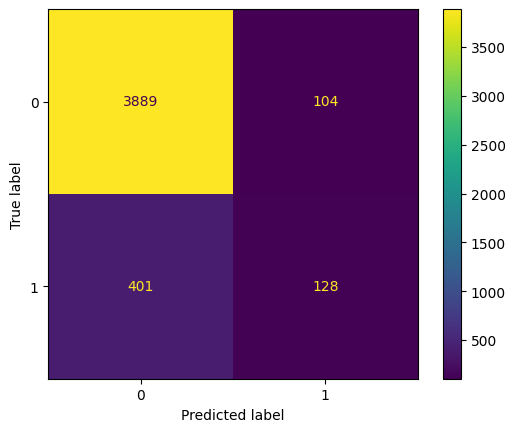

In [ ]:
#MLP1 Test Confusion Matrix
mlp1_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp1_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp1_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

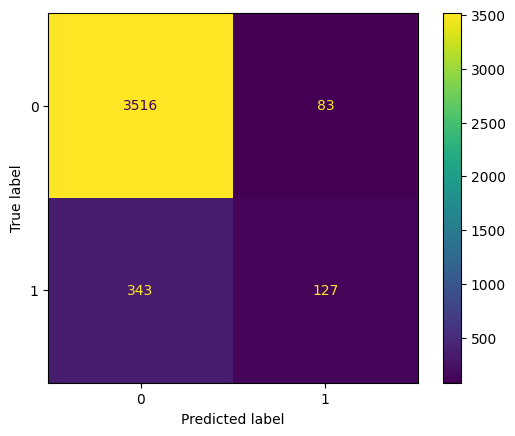

In [ ]:
#MLP1 Test Confusion Matrix
mlp1_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp1_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp1_cm_valid.plot()
plt.show()

MLP2 - Multi-Layer Perceptron (200 hidden layers)

In [95]:
#Define MLP
mlp2 = MLPClassifier(hidden_layer_sizes = (202, 50), activation = "tanh", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp2.fit(X_train, Y_train)
#Test Predictions
mlp2_Y_pred_test = mlp2.predict(X_test)
#Validation Predictions
mlp2_Y_pred_valid = mlp2.predict(X_valid)

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [96]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp2_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3993
           1       0.55      0.25      0.35       529

    accuracy                           0.89      4522
   macro avg       0.73      0.61      0.64      4522
weighted avg       0.87      0.89      0.87      4522



In [97]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp2_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3599
           1       0.61      0.26      0.37       470

    accuracy                           0.90      4069
   macro avg       0.76      0.62      0.65      4069
weighted avg       0.88      0.90      0.88      4069



<Figure size 0.2x0.2 with 0 Axes>

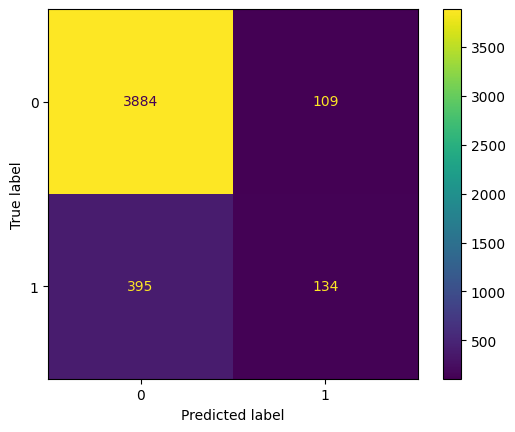

In [98]:
#MLP2 Test Confusion Matrix
mlp2_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp2_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp2_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

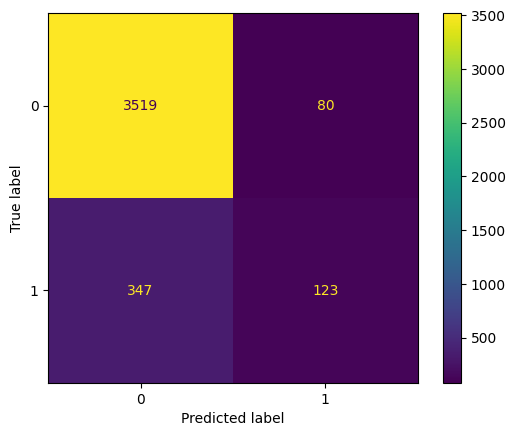

In [99]:
#MLP2 Test Confusion Matrix
mlp2_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp2_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp2_cm_valid.plot()
plt.show()

MLP3 - Multi-Layer Perceptron (2000 hidden layers)

In [79]:
#Define MLP
mlp3 = MLPClassifier(hidden_layer_sizes = (2000, 400), activation = "tanh", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp3.fit(X_train, Y_train)
#Test Predictions
mlp3_Y_pred_test = mlp3.predict(X_test)
#Validation Predictions
mlp3_Y_pred_valid = mlp3.predict(X_valid)

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [80]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp3_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3993
           1       0.53      0.29      0.37       529

    accuracy                           0.89      4522
   macro avg       0.72      0.63      0.65      4522
weighted avg       0.87      0.89      0.87      4522



In [81]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp3_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3599
           1       0.59      0.29      0.39       470

    accuracy                           0.89      4069
   macro avg       0.75      0.63      0.67      4069
weighted avg       0.88      0.89      0.88      4069



<Figure size 0.2x0.2 with 0 Axes>

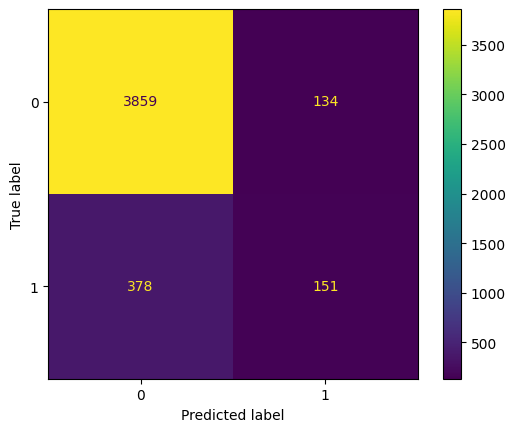

In [82]:
#MLP3 Test Confusion Matrix
mlp3_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp3_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp3_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

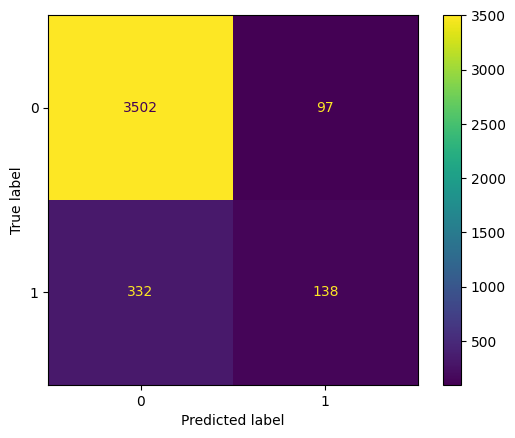

In [83]:
#MLP3 Test Confusion Matrix
mlp3_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp3_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp3_cm_valid.plot()
plt.show()